In [40]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from datetime import datetime, timedelta
import time
import yfinance as yahoofinance
from bs4 import BeautifulSoup

In [15]:
def inflation_rate_finder(tab,country):
    locate = tab.index[tab["Countries"] == country].tolist()[0]
    interest = tab["CPI Interannual"][locate]
    number = float(interest.rstrip('%'))
    return number

In [36]:
def independent_inflation_rate_finder(tab,country):
    locate = tab.index[tab[0] == country].tolist()[0]
    interest = tab[2][locate]
    number = float(interest.rstrip('%'))
    return number

In [49]:
def get_div_content(url, class_name):
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        div_element = soup.find('div', class_=class_name)
        
        if div_element:
            content = div_element.text.strip()
            number = float(content.rstrip('%'))
            return number
        else:
            print("Div element not found.")
            return None
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
        return None

In [56]:
def purchasing_power_parity_matrix(interest_list):
    countries = interest_list["Country"].tolist()
    matrix = pd.DataFrame(index=countries, columns=countries)
    
    for country1 in countries:
        for country2 in countries:
            rate_ratio = interest_list.loc[interest_list["Country"] == country1, "Current rate"].values[0] / interest_list.loc[interest_list["Country"] == country2, "Current rate"].values[0]
            matrix.loc[country1, country2] = rate_ratio

    return matrix

In [2]:
url = "https://countryeconomy.com/cpi"

In [3]:
response = requests.get(url)

In [4]:
tables = pd.read_html(response.content)

In [11]:
table['Countries'] = table['Countries'].apply(lambda x: x.replace('[+]', '').strip())

In [12]:
table

,Countries,Date,CPI Interannual,CPI Interannual.1,Accum. since January,Accum. since January.1
0,United States,November 2023,3.1%,NaN,3.5%,NaN
1,United Kingdom,November 2023,3.9%,NaN,3.5%,NaN
2,Germany,November 2023,3.2%,NaN,3.6%,NaN
3,France,November 2023,3.4%,NaN,3.5%,NaN
4,Japan,November 2023,2.9%,NaN,2.7%,NaN
...,...,...,...,...,...,...
91,Uruguay,October 2023,4.3%,NaN,4.9%,NaN
92,Uzbekistan,November 2023,8.8%,NaN,7.2%,NaN
93,Venezuela,November 2023,282.8%,NaN,182.9%,NaN
94,South Africa,November 2023,5.6%,NaN,5.2%,NaN


In [20]:
euro_url = "https://countryeconomy.com/countries/euro-zone"

In [21]:
euro_response = requests.get(euro_url)

In [22]:
euro_table = pd.read_html(euro_response.content)

In [30]:
euro_table[0][0] = euro_table[0][0].apply(lambda x: x.replace('[+]', '').strip())

In [32]:
euro_table = euro_table[0]

In [35]:
euro_table

,0,1,2
0,Gouvernement,Gouvernement,Gouvernement
1,Qu. GDP Per Capita,2023Q2,"10,436K"
2,Annual GDP,2022,"€13,424,177M"
3,Annual GDP,2022,"$14,040,894M"
4,GDP per capita,2022,"€38,960"
5,GDP per capita,2022,"$40,984"
6,Quarterly GDP,2023Q3,"€3,591,737M"
7,Debt (M.€.),2012,8600983
8,Debt ($M),2012,11050543
9,Debt (%GDP),2012,90.60%


In [41]:
singapore_url = "https://www.rateinflation.com/inflation-rate/singapore-inflation-rate/"

In [42]:
singapore_class_name = "css-in3yi3 e1x5eoea5"

In [50]:
australia = inflation_rate_finder(table,"Australia")
usa = inflation_rate_finder(table,"United States")
england = inflation_rate_finder(table, "United Kingdom")
canada = inflation_rate_finder(table, "Canada")
japan = inflation_rate_finder(table, "Japan")
new_zealand = inflation_rate_finder(table, "New Zealand")
euro = independent_inflation_rate_finder(euro_table,"HICP")
denmark = inflation_rate_finder(table, "Denmark")
sweden = inflation_rate_finder(table, "Sweden")
mexico = inflation_rate_finder(table, "Mexico")
switzerland = inflation_rate_finder(table, "Switzerland")
singapore = get_div_content(singapore_url,singapore_class_name)
norway = inflation_rate_finder(table, "Norway")

In [52]:
inflation_list = {"Country": ["Australia","United States","United Kingdom","Canada","Japan","New Zealand","Euro Area","Denmark","Sweden","Mexico","Switzerland","Singapore","Norway"],
                  "Current rate": [australia,usa,england,canada,japan,new_zealand,euro,denmark,sweden,mexico,switzerland,singapore,norway]}

In [54]:
inflation_list = pd.DataFrame(inflation_list)
inflation_list

,Country,Current rate
0,Australia,5.400
1,United States,3.100
2,United Kingdom,3.900
3,Canada,3.100
4,Japan,2.900
5,New Zealand,5.700
6,Euro Area,2.400
7,Denmark,0.600
8,Sweden,5.800
9,Mexico,4.300


In [57]:
result_matrix = purchasing_power_parity_matrix(inflation_list)
result_matrix

,Australia,United States,United Kingdom,Canada,Japan,New Zealand,Euro Area,Denmark,Sweden,Mexico,Switzerland,Singapore,Norway
Australia,1.0,1.741935,1.384615,1.741935,1.862069,0.947368,2.25,9.0,0.931034,1.255814,3.857143,1.137321,1.125
United States,0.574074,1.0,0.794872,1.0,1.068966,0.54386,1.291667,5.166667,0.534483,0.72093,2.214286,0.652906,0.645833
United Kingdom,0.722222,1.258065,1.0,1.258065,1.344828,0.684211,1.625,6.5,0.672414,0.906977,2.785714,0.821398,0.8125
Canada,0.574074,1.0,0.794872,1.0,1.068966,0.54386,1.291667,5.166667,0.534483,0.72093,2.214286,0.652906,0.645833
Japan,0.537037,0.935484,0.74359,0.935484,1.0,0.508772,1.208333,4.833333,0.5,0.674419,2.071429,0.610783,0.604167
New Zealand,1.055556,1.83871,1.461538,1.83871,1.965517,1.0,2.375,9.5,0.982759,1.325581,4.071429,1.200505,1.1875
Euro Area,0.444444,0.774194,0.615385,0.774194,0.827586,0.421053,1.0,4.0,0.413793,0.55814,1.714286,0.505476,0.5
Denmark,0.111111,0.193548,0.153846,0.193548,0.206897,0.105263,0.25,1.0,0.103448,0.139535,0.428571,0.126369,0.125
Sweden,1.074074,1.870968,1.487179,1.870968,2.0,1.017544,2.416667,9.666667,1.0,1.348837,4.142857,1.221567,1.208333
Mexico,0.796296,1.387097,1.102564,1.387097,1.482759,0.754386,1.791667,7.166667,0.741379,1.0,3.071429,0.905644,0.895833


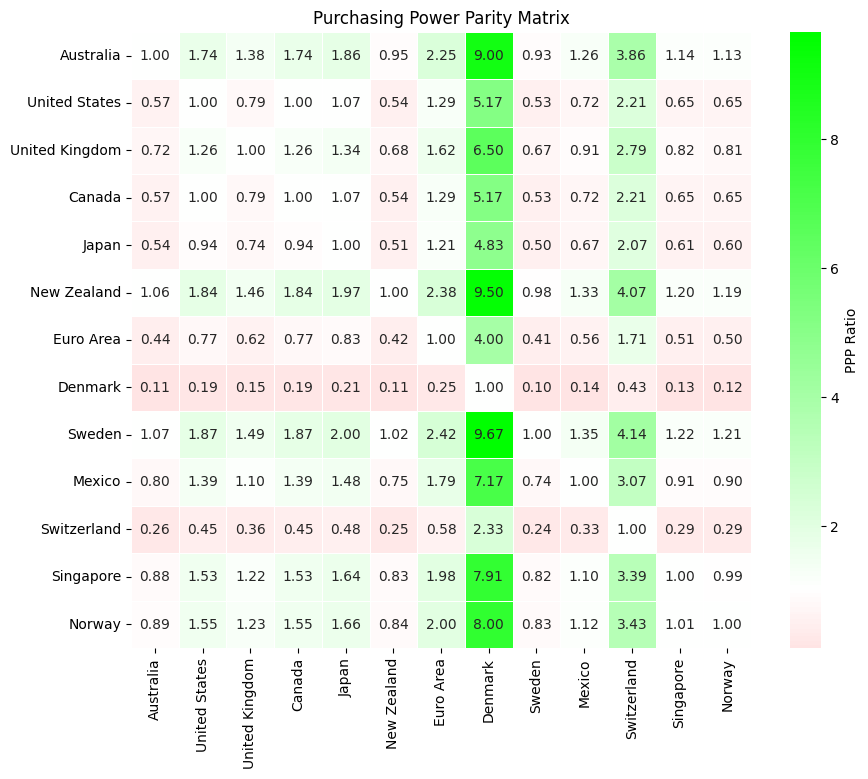

In [61]:
colors = [(1, 0, 0), (1, 1, 1), (0, 1, 0)]
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

plt.figure(figsize=(10, 8))
sns.heatmap(result_matrix.astype(float), annot=True, cmap=cmap, center=1, fmt=".2f", linewidths=.5, cbar_kws={'label': 'PPP Ratio'})
plt.title('Purchasing Power Parity Matrix')
plt.show()